# Example: combatting $N<P$ problem in linear model with different types of weight penalization

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

np.random.seed(42)

import  matplotlib.pyplot as plt
%matplotlib inline

In [22]:
N = 200
P = 1000
num_actual_predictors = 10

# y = np.random.randint(10, size=(N))

betas = np.zeros(P)
betas[np.random.randint(P, size = num_actual_predictors )] = 1.0
X = np.random.randn(N,P)

sigma = 1.0
noise = sigma*np.random.randn(N)
y = X.dot(betas) + noise
# X.shape

In [23]:
np.linalg.matrix_rank(X.T.dot(X))

680

In [24]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=3)

In [25]:
covarX = X_train.T.dot(X_train)

betahat = np.linalg.solve(covarX, X_train.T).dot(y_train)
mse = np.mean((X_train.dot(betahat) - y_train)**2)
mse

9.1918012754251952e-27

In [ ]:
# betahat - betas

In [26]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression

mo = {}

mo["lr"] = LinearRegression()
mo["lr"].fit(X_train, y_train,)
mo["lr"]

mo["elastic_net"] = ElasticNetCV(l1_ratio=0.5, cv=5)
mo["elastic_net"].fit(X_train, y_train,)
mo["elastic_net"]

mo["lasso"] = LassoCV(cv=5)
mo["lasso"].fit(X_train, y_train,)
mo["lasso"]

mo["ridge"] = RidgeCV(cv=5)
mo["ridge"].fit(X_train, y_train,)
mo["ridge"]

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

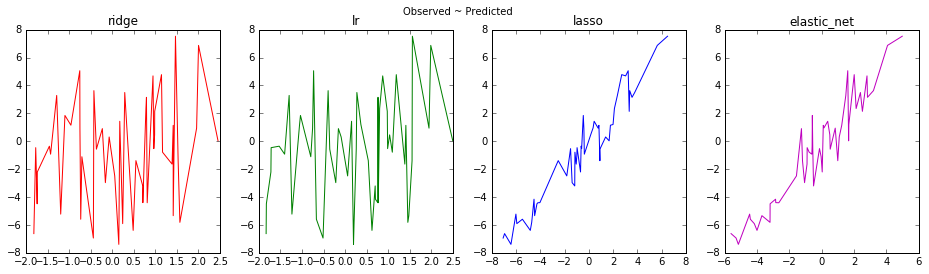

In [35]:
yhats = {}
colors = ['r', 'g', 'b', 'm', 'c']
fig, axs = plt.subplots(1,4, figsize=(16, 4))

plt.suptitle("Observed ~ Predicted")
for (kk,vv), ax,cc in zip(mo.items(), axs, colors):
# for (kk, vv), cc in zip(mo.items(), colors):
    yhats[kk] = vv.predict(X_test)
    order = np.argsort(yhats[kk])
    ax.plot(yhats[kk][order], y_test[order], label = kk,c = cc)
    ax.set_title(kk)

In [55]:
from sklearn.linear_model import ElasticNet
alphas = 10**np.linspace(-4, 1, 50)# mo["elastic_net"].alphas_
train_r2 = []
test_r2 = []
for aa in alphas:
    mo_ = ElasticNet(l1_ratio=0.5, alpha=aa)
    mo_.fit(X_train, y_train)
    train_r2.append( mo_.score(X_train, y_train) )
    test_r2.append( mo_.score(X_test, y_test) )
# plt.plot(mo_.alphas_, mo_.mse_path_.mean(1))
# mo_.score?

/Users/dlituiev/repos/scikit-learn/sklearn/linear_model/coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


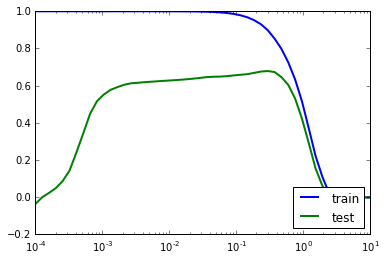

In [56]:
plt.plot(alphas, train_r2, label = "train", lw=2)
plt.plot(alphas, test_r2, label = "test", lw=2)
plt.xscale("log")
plt.legend(loc="lower right")

## Let us compare prediction accuracy on train and validation set

In [50]:
print("R^2 in-sample:")
{kk: "%.4f" % vv.score(X_train, y_train ) for kk,vv in mo.items()}

R^2 in-sample:


{'elastic_net': '0.7112', 'lasso': '0.8460', 'lr': '0.6395', 'ridge': '0.6382'}

In [52]:
print("R^2 of prediction:")
{kk: "%.4f" % vv.score(X_test, y_test ) for kk,vv in mo.items()}

R^2 of prediction:


{'elastic_net': '0.3932', 'lasso': '0.7124', 'lr': '0.0288', 'ridge': '0.0358'}

In [11]:
print("L2 norm of the coefficients:")
{kk: np.sqrt(sum(vv.coef_**2)) for kk,vv in mo.items()}

L2 norm of the coefficients:


{'elastic_net': 1.3846329611053267,
 'lasso': 1.9704694972436814,
 'lr': 0.93432935152242635,
 'ridge': 0.91811019512644598}

In [12]:
print("L1 norm of the coefficients:")
{kk:sum(abs(vv.coef_)) for kk,vv in mo.items()}

L1 norm of the coefficients:


{'elastic_net': 8.768481767306767,
 'lasso': 8.7046900440382835,
 'lr': 23.496130942978553,
 'ridge': 23.274558796018049}

## Visualize model coefficients

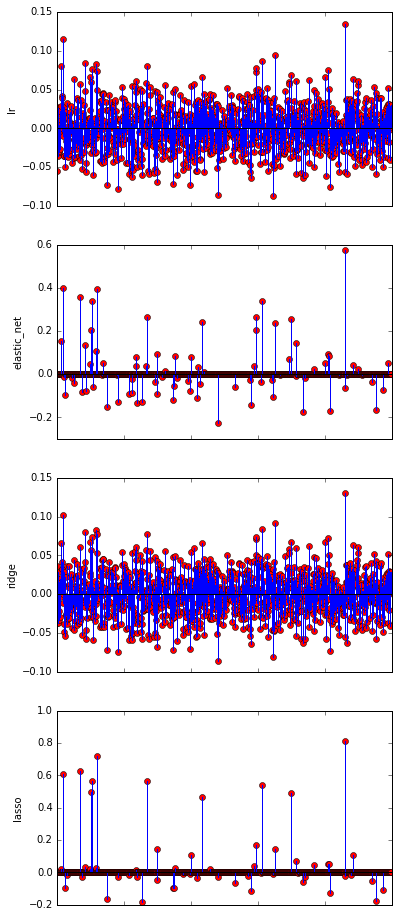

In [13]:
fig, axs = plt.subplots(4, figsize=(6, 16))

for (kk,vv), ax in zip(mo.items(), axs):
    ax.stem(vv.coef_, markerfmt="ro", basefmt='k'+"-")
    ax.set_ylabel(kk)
    ax.set_xticklabels([])

pass